# Table of Contents
 <p><div class="lev1"><a href="#Visualizing-Network-Data"><span class="toc-item-num">1&nbsp;&nbsp;</span>Visualizing Network Data</a></div><div class="lev2"><a href="#Problem-1.1---Summarizing-the-Data"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem 1.1 - Summarizing the Data</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-1.2---Summarizing-the-Data"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem 1.2 - Summarizing the Data</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-1.3---Summarizing-the-Data"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Problem 1.3 - Summarizing the Data</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-2.1---Creating-a-Network"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Problem 2.1 - Creating a Network</a></div><div class="lev2"><a href="#Problem-2.2---Creating-a-Network"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Problem 2.2 - Creating a Network</a></div><div class="lev2"><a href="#Problem-2.3---Creating-a-Network"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Problem 2.3 - Creating a Network</a></div><div class="lev2"><a href="#Problem-2.4---Creating-a-Network"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Problem 2.4 - Creating a Network</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.7.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-3.1---Coloring-Vertices"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Problem 3.1 - Coloring Vertices</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-3.2---Coloring-Vertices"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Problem 3.2 - Coloring Vertices</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.9.1&nbsp;&nbsp;</span>Explanation</a></div><div class="lev2"><a href="#Problem-3.3---Coloring-Vertices"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Problem 3.3 - Coloring Vertices</a></div><div class="lev2"><a href="#Problem-4---Other-Plotting-Options"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Problem 4 - Other Plotting Options</a></div><div class="lev3"><a href="#Explanation"><span class="toc-item-num">1.11.1&nbsp;&nbsp;</span>Explanation</a></div>

Visualizing Network Data
========================

The cliche goes that the world is an increasingly interconnected place, and the connections between different entities are often best represented with a graph. Graphs are comprised of vertices (also often called "nodes") and edges connecting those nodes. In this assignment, we will learn how to visualize networks using the igraph package in R.

For this assignment, we will visualize social networking data using anonymized data from Facebook; this data was originally curated in a recent paper about computing social circles in social networks. In our visualizations, the vertices in our network will represent Facebook users and the edges will represent these users being Facebook friends with each other.

The first file we will use, edges.csv, contains variables V1 and V2, which label the endpoints of edges in our network. Each row represents a pair of users in our graph who are Facebook friends. For a pair of friends A and B, edges.csv will only contain a single row -- the smaller identifier will be listed first in this row. From this row, we will know that A is friends with B and B is friends with A.

The second file, users.csv, contains information about the Facebook users, who are the vertices in our network. This file contains the following variables:

- id: A unique identifier for this user; this is the value that appears in the rows of edges.csv

- gender: An identifier for the gender of a user taking the values A and B. Because the data is anonymized, we don't know which value refers to males and which value refers to females.

- school: An identifier for the school the user attended taking the values A and AB (users with AB attended school A as well as another school B). Because the data is anonymized, we don't know the schools represented by A and B.

- locale: An identifier for the locale of the user taking the values A and B. Because the data is anonymized, we don't know which value refers to what locale.

## Problem 1.1 - Summarizing the Data

Load the data from edges.csv into a data frame called edges, and load the data from users.csv into a data frame called users.

How many Facebook users are there in our dataset?

In [1]:
edges <- read.csv("edges.csv")
users <- read.csv("users.csv")

In [2]:
str(users)

'data.frame':	59 obs. of  4 variables:
 $ id    : int  3981 3982 3983 3984 3985 3986 3987 3988 3989 3990 ...
 $ gender: Factor w/ 3 levels "","A","B": 2 3 3 3 3 3 2 3 3 2 ...
 $ school: Factor w/ 3 levels "","A","AB": 2 1 1 1 1 2 1 1 2 1 ...
 $ locale: Factor w/ 3 levels "","A","B": 3 3 3 3 3 3 2 3 3 2 ...


In [3]:
str(edges)

'data.frame':	146 obs. of  2 variables:
 $ V1: int  4019 4023 4023 4027 3988 3982 3994 3998 3993 3982 ...
 $ V2: int  4026 4031 4030 4032 4021 3986 3998 3999 3995 4021 ...


In [4]:
summary(edges)

       V1             V2      
 Min.   : 594   Min.   :3986  
 1st Qu.:3987   1st Qu.:4009  
 Median :3997   Median :4021  
 Mean   :3929   Mean   :4018  
 3rd Qu.:4008   3rd Qu.:4030  
 Max.   :4031   Max.   :4038  

### Explanation

From str(edges) or nrow(edges), we see that there are 146 pairs of users in our dataset who are Facebook friends.

However, each pair (A, B) must be counted twice, because B is a friend of A and A is a friend of B. To think of this in simpler terms, consider a network with just new people, A and B, and a single edge (A, B). Even though there are two vertices and one edge, each user has on average one friend.

For our network, the average number of friends per user is 292/59=4.95.

Finally, note that in all likelihood these users have a much higher number of Facebook friends. We are computing here the average number of people in this dataset who are their friends, instead of the average total number of Facebook friends.

## Problem 1.2 - Summarizing the Data

Out of all the students who listed a school, what was the most common locale?

- Locale A
- Locale B

In [5]:
table(users$locale, users$school)

   
        A AB
     3  0  0
  A  6  0  0
  B 31 17  2

### Explanation

We read that all students listed at schools A and B listed their locale as B.

## Problem 1.3 - Summarizing the Data

Is it possible that either school A or B is an all-girls or all-boys school?

In [6]:
table(users$gender, users$school)

   
        A AB
     1  1  0
  A 11  3  1
  B 28 13  1

### Explanation

We see from table(users\$gender, users\$school) that both genders A and B have attended schools A and B.

## Problem 2.1 - Creating a Network

We will be using the igraph package to visualize networks; install and load this package using the install.packages and library commands.

We can create a new graph object using the graph.data.frame() function. Based on ?graph.data.frame, which of the following commands will create a graph g describing our social network, with the attributes of each user correctly loaded?

Note: A directed graph is one where the edges only go one way -- they point from one vertex to another. The other option is an undirected graph, which means that the relations between the vertices are symmetric.


- g = graph.data.frame(edges, FALSE, users)
- g = graph.data.frame(users, FALSE, edges)
- g = graph.data.frame(edges, TRUE, users)
- g = graph.data.frame(users, TRUE, edges)

In [7]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [8]:
?graph.data.frame

Explanation
From ?graph.data.frame, we can see that the function expects the first two columns of parameter d to specify the edges in the graph -- our edges object fits this description.
Our edges are undirected -- if A is a Facebook friend of B then B is a Facebook friend of A. Therefore, we set the directed parameter to FALSE.
The vertices parameter expects a data frame where the first column is a vertex id and the remaining columns are properties of vertices in our graph. This is the case with our users data frame.

\Rhightarrow g = graph.data.frame(edges, FALSE, users)

## Problem 2.2 - Creating a Network

Use the correct command from Problem 2.1 to load the graph g.

In [9]:
g = graph.data.frame(edges, FALSE, users)

Now, we want to plot our graph. By default, the vertices are large and have text labels of a user's identifier. Because this would clutter the output, we will plot with no text labels and smaller vertices:

plot(g, vertex.size=5, vertex.label=NA)

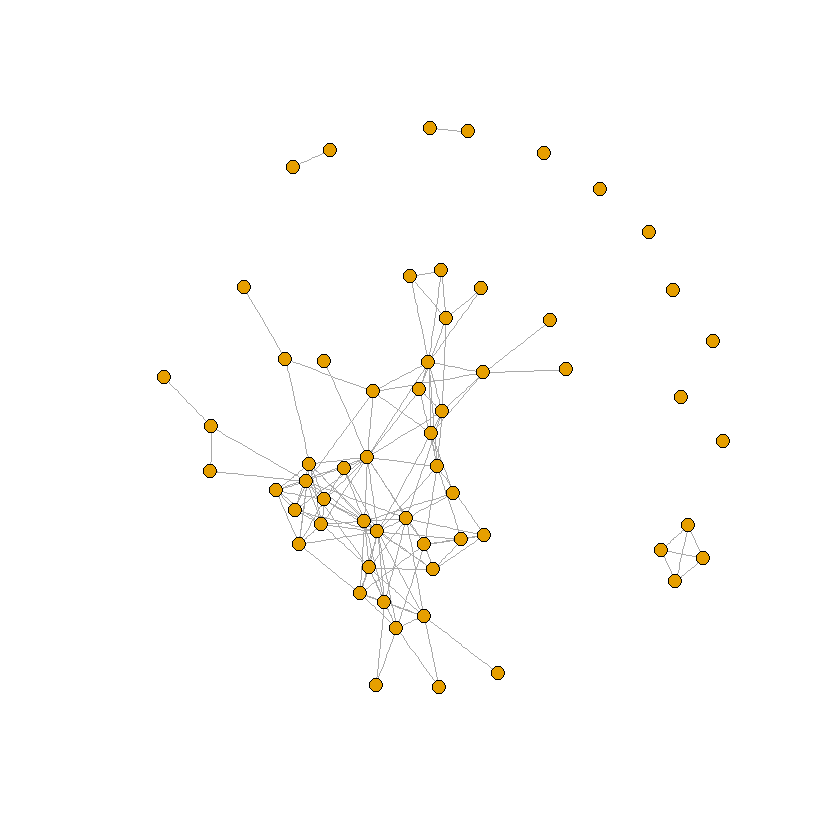

In [10]:
plot(g, vertex.size=5, vertex.label=NA)

In this graph, there are a number of groups of nodes where all the nodes in each group are connected but the groups are disjoint from one another, forming "islands" in the graph. Such groups are called "connected components," or "components" for short. How many connected components with at least 2 nodes are there in the graph?

In addition to the large connected component, there is a 4-node component and two 2-node components.

How many users are there with no friends in the network?

There are 7 nodes that are not connected to any other nodes. Each forms a 1-node connected component.

## Problem 2.3 - Creating a Network

In our graph, the "degree" of a node is its number of friends. We have already seen that some nodes in our graph have degree 0 (these are the nodes with no friends), while others have much higher degree. We can use degree(g) to compute the degree of all the nodes in our graph g.

How many users are friends with 10 or more other Facebook users in this network?

In [11]:
table(degree(g))


 0  1  2  3  4  5  6  7  8  9 10 11 13 17 18 
 7 10  4  9  1  4  4  3  6  2  4  1  2  1  1 

From table(degree(g)) or table(degree(g) >= 10), we can see that there are 9 users with 10 or more friends in this network.

## Problem 2.4 - Creating a Network

In a network, it's often visually useful to draw attention to "important" nodes in the network. While this might mean different things in different contexts, in a social network we might consider a user with a large number of friends to be an important user. From the previous problem, we know this is the same as saying that nodes with a high degree are important users.

To visually draw attention to these nodes, we will change the size of the vertices so the vertices with high degrees are larger. To do this, we will change the "size" attribute of the vertices of our graph to be an increasing function of their degrees:

V(g)$size = degree(g)/2+2

In [12]:
V(g)$size = degree(g)/2+2

Now that we have specified the vertex size of each vertex, we will no longer use the vertex.size parameter when we plot our graph:

plot(g, vertex.label=NA)

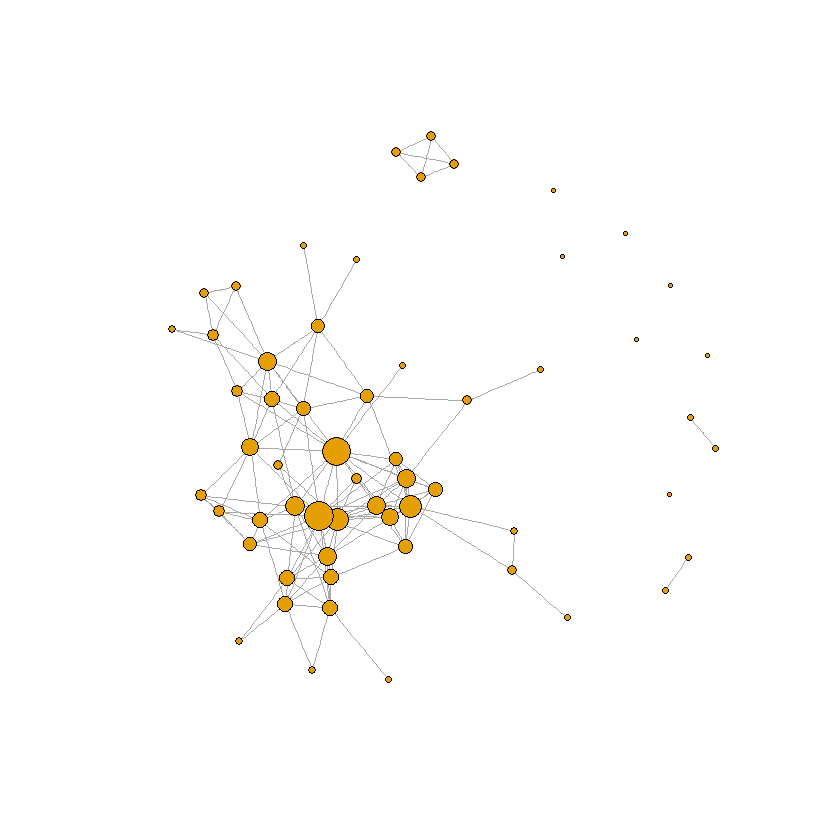

In [13]:
plot(g, vertex.label=NA)

What is the largest size we assigned to any node in our graph?

In [14]:
table(V(g)$size)


   2  2.5    3  3.5    4  4.5    5  5.5    6  6.5    7  7.5  8.5 10.5   11 
   7   10    4    9    1    4    4    3    6    2    4    1    2    1    1 

### Explanation

From table(degree(g)) or summary(degree(g)), we see that the maximum degree of any node in the graph is 18 and the minimum degree of any node is 0. Therefore, the maximum size of any point is 18/2+2=11, and the minimum size is 0/2+2=2.

## Problem 3.1 - Coloring Vertices

Thus far, we have changed the "size" attributes of our vertices. However, we can also change the colors of vertices to capture additional information about the Facebook users we are depicting.

When changing the size of nodes, we first obtained the vertices of our graph with V(g) and then accessed the the size attribute with V(g)\$size. To change the color, we will update the attribute V(g)$color.

To color the vertices based on the gender of the user, we will need access to that variable. When we created our graph g, we provided it with the data frame users, which had variables gender, school, and locale. These are now stored as attributes V(g)\$gender, V(g)\$school, and V(g)\$locale.

We can update the colors by setting the color to black for all vertices, than setting it to red for the vertices with gender A and setting it to gray for the vertices with gender B:

V(g)\$color = "black"

V(g)\$color[V(g)\$gender == "A"] = "red"

V(g)\$color[V(g)\$gender == "B"] = "gray"

Plot the resulting graph. What is the gender of the users with the highest degree in the graph?

In [15]:
V(g)$color = "black"
V(g)$color[V(g)$gender == "A"] = "red"
V(g)$color[V(g)$gender == "B"] = "gray"

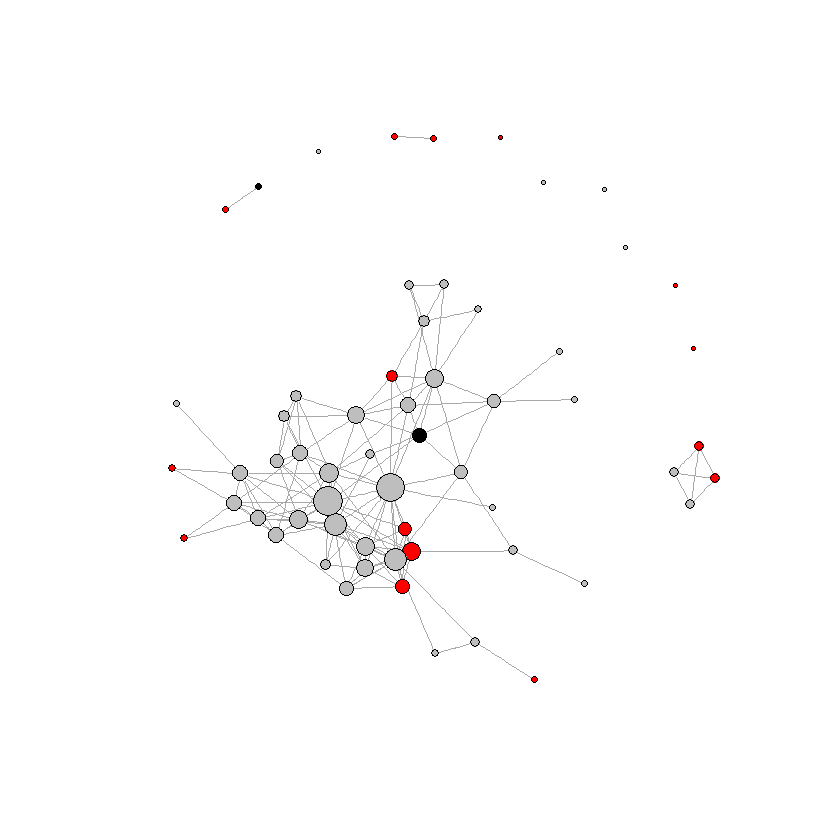

In [16]:
plot(g, vertex.label=NA)

### Explanation

After updating V(g)$color, run plot(g, vertex.label=NA) to plot the graph. All the largest nodes (the ones with the highest degree) are colored gray, which corresponds to Gender B.

## Problem 3.2 - Coloring Vertices

Now, color the vertices based on the school that each user in our network attended.

Are the two users who attended both schools A and B Facebook friends with each other?

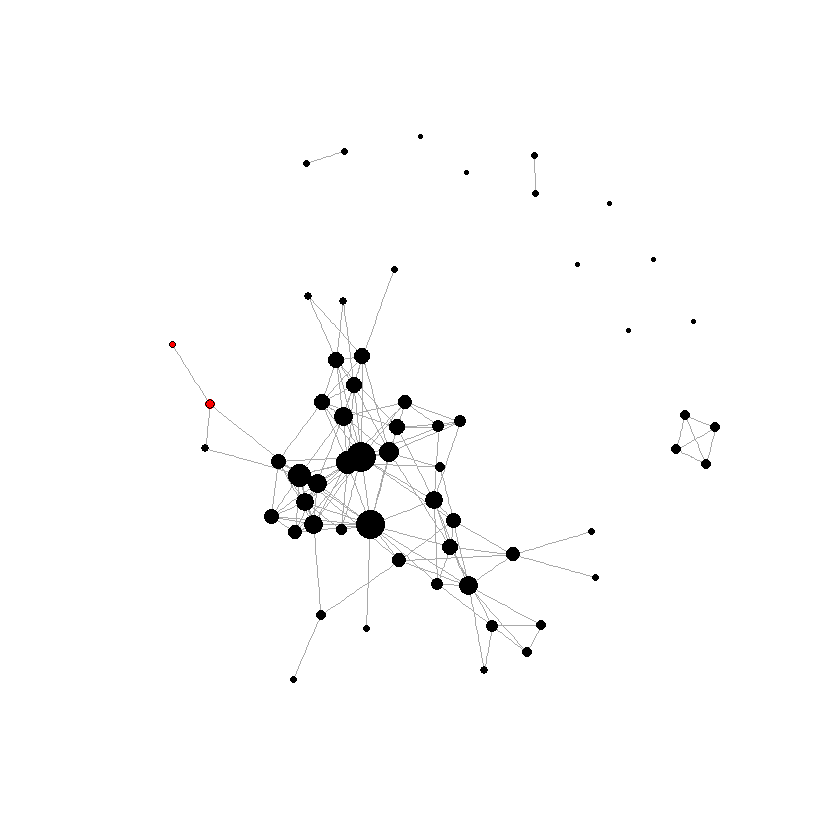

In [17]:
V(g)$color = "black"
V(g)$color[V(g)$school == "AB"] = "red"
#V(g)$color[V(g)$school == "B"] = "gray"

plot(g, vertex.label=NA)

What best describes the users with highest degree?

- None of the high-degree users attended school A
- Some, but not all, of the high-degree users attended school A
- All of the high-degree users attended school A

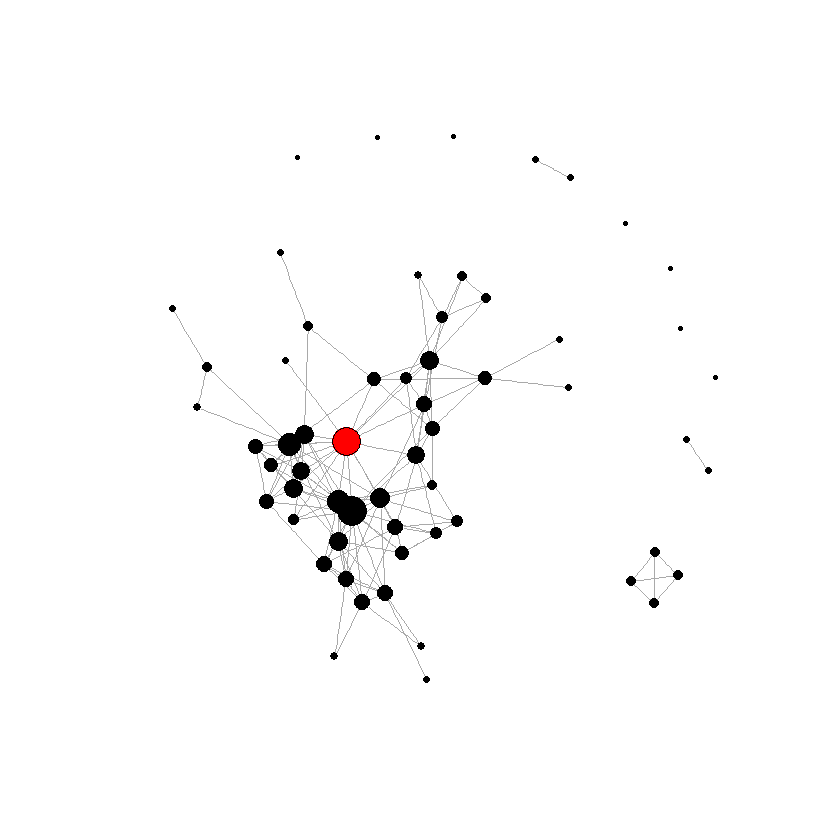

In [18]:
V(g)$color = "black"
V(g)$color[V(g)$school == "A" & V(g)$size >= 10] = "red"
#V(g)$color[V(g)$school == "B"] = "gray"

plot(g, vertex.label=NA)

### Explanation

As with coloring by gender, we will set the color for all vertices to black, and then we will set the color for students from school A to red and the color for students from schools A and B to gray. Finally we will plot the updated graph:

V(g)$color = "black"
V(g)$color[V(g)$school == "A"] = "red"
V(g)$color[V(g)$school == "AB"] = "gray"
plot(g, vertex.label=NA)

The two students who attended schools A and B are colored gray; we can see from the graph that they are Facebook friends (aka they are connected by an edge).

The high-degree users (depicted by the large nodes) are a mixture of red and black color, meaning some of these users attended school A and other did not.

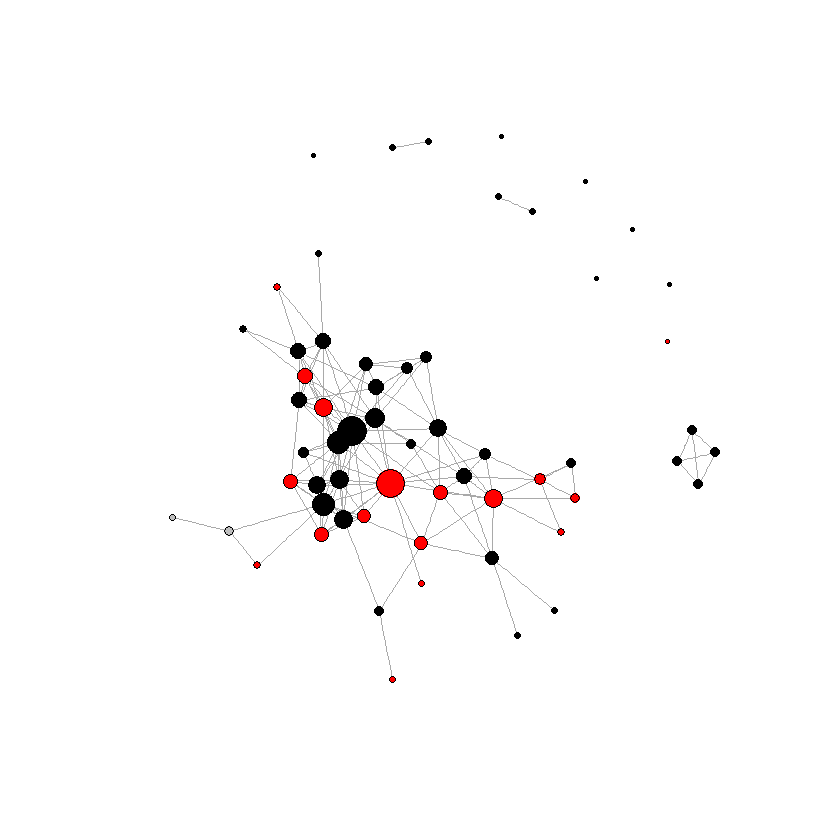

In [19]:
V(g)$color = "black"
V(g)$color[V(g)$school == "A"] = "red"
V(g)$color[V(g)$school == "AB"] = "gray"
plot(g, vertex.label=NA)

## Problem 3.3 - Coloring Vertices

Now, color the vertices based on the locale of the user.

The large connected component is most associated with which locale?

The 4-user connected component is most associated with which locale?

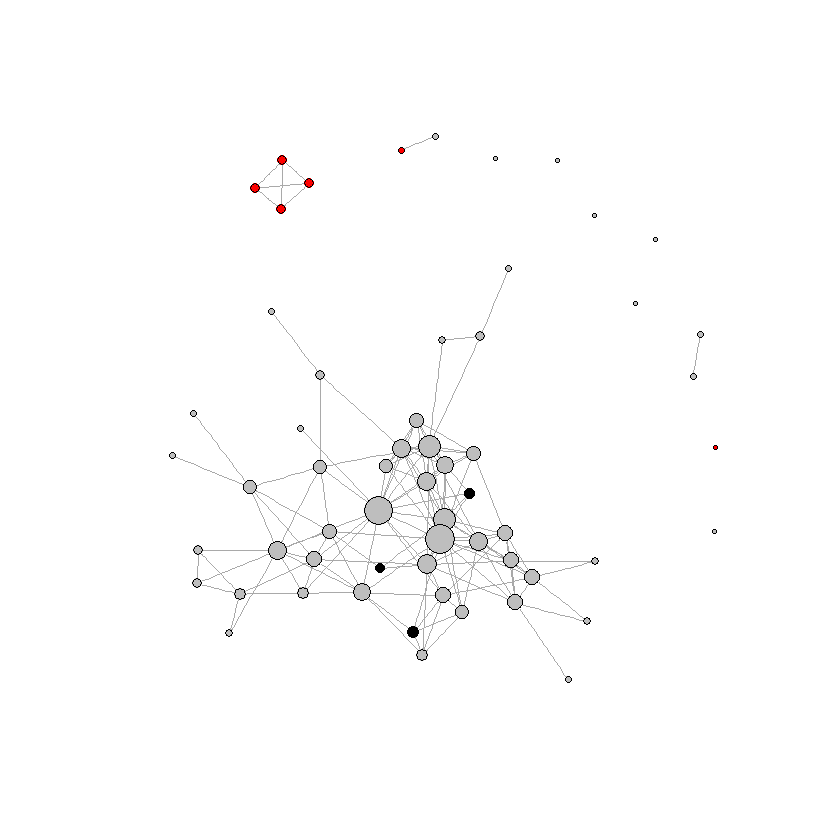

In [20]:
V(g)$color = "black"
V(g)$color[V(g)$locale == "A"] = "red"
V(g)$color[V(g)$locale == "B"] = "gray"
plot(g, vertex.label=NA)

Nearly all of the vertices from the large connected component are colored gray, indicating users from Locale B.

Meanwhile, all the vertices in the 4-user connected component are colored red, indicating users from Locale A.

## Problem 4 - Other Plotting Options

The help page is a helpful tool when making visualizations. Answer the following questions with the help of ?igraph.plotting and experimentation in your R console.

Which igraph plotting function would enable us to plot our graph in 3-D?

What parameter to the plot() function would we use to change the edge width when plotting g?

In [21]:
?igraph.plotting 

### Explanation

The three functions to plot the igraph are 

- plot.igraph (the function we used through the command "plot"), 
- tkplot, 
- and rglplot. 

rglplot makes 3-D plots -- you can try one with rglplot(g, vertex.label=NA).


To change the edge width, you need to change the edge parameter called "width".

From ?igraph.plotting, we read that we need to append the prefix "edge." to the beginning for our call to plot, so the full parameter is called "edge.width". For instance, we could plot with edge width 2 with the command plot(g, edge.width=2, vertex.label=NA).

In [22]:
#install.packages("rgl")
rglplot(g, vertex.label=NA)

In [1]:
rglplot(g, vertex.label=NA)

Warning message:
"package 'rgl' was built under R version 3.3.2"

ERROR: Error in eval(expr, envir, enclos): impossible de trouver la fonction "rglplot"
